### Implementing simple Chatbot Using LangGraph

In [2]:
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [langgraph]
Note: you may need to restart the kernel to use updated packages.


In [3]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [6]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-C81qZzDnEq65N5kFAE0vL8kZmdUKe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1f84f691-f3a8-4c8d-99d3-5b64c4a489d7-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="<think>\nOkay, the user is Krish and he mentioned he likes to play cricket. Let me start by acknowledging his name and interest. I should make sure to respond in a friendly and engaging way.\n\nFirst, I'll greet him and confirm that I heard his name and his love for cricket. Then, maybe ask if he plays as a hobby or is into competitive sports. That could open up more conversation.\n\nI should also check if there are any recent cricket events or tournaments he might be interested in. Maybe suggest discussing strategies or techniques if he's looking to improve. But I need to keep it light and not overwhelm him with too many options.\n\nAlso, since he's sharing a bit about himself, it's good to be encouraging. Praise his interest in cricket as it's a great sport. Maybe mention the teamwork and skills involved to show I understand the game.\n\nI should avoid making assumptions beyond what he's said. Don't want to assume his skill level or how much he plays. Keep the ques

### We Will start With Creating Nodes

In [11]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

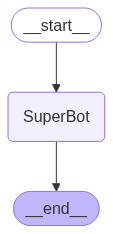

In [12]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='0d2ba099-8719-4e13-a870-3967969b0323'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Krish and mentioned he likes cricket. Let me think about how to respond. First, I should acknowledge his name and his interest. Maybe ask him about his favorite teams or players to engage further. Also, since cricket is popular in countries like India, Pakistan, Australia, etc., perhaps ask where he's from. But wait, I shouldn't make assumptions. Let me keep it general. Maybe ask if he plays cricket or just watches. Also, mention some popular aspects of cricket like T20s, Tests, or ODI. Keep the tone friendly and encouraging. Let me check if there are any common follow-up questions. Oh, maybe ask about his favorite memories related to cricket. Let me structure a response that is welcoming and prompts him to share more.\n</think>\n\nHi Krish! 🏏 It's great to 

#### Streaming The responses

In [14]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced themselves as KRish. I should acknowledge their name and offer assistance. Let me make sure to respond warmly and invite them to ask questions or share what's on their mind. I need to keep the tone friendly and open-ended. Maybe add an emoji to keep it approachable. Let me check for any typos and ensure the response is clear.\n</think>\n\nHello KRish! 😊 Nice to meet you! How can I assist you today? Feel free to ask questions, share thoughts, or let me know if you need help with anything specific. I'm here to help! 🌟", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 14, 'total_tokens': 142, 'completion_time': 0.278238915, 'prompt_time': 0.007227144, 'queue_time': 0.084877505, 'total_time': 0.285466059}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d6